In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple, Dict, List
from functools import reduce

In [30]:
#normalizamos una distribucion a un tamaño
def normalize_distribution(dist: np.array, n: int) -> np.array:
    b = dist - min(dist) + 0.000001
    c = (b / np.sum(b)) * n
    return np.round(c)

In [31]:
#creamos la funcion normalizada con una medida y tamaño
def create_distribution(mean: float, size: int) -> pd.Series:
    return normalize_distribution(np.random.standard_normal(size), mean * size)

In [32]:
def generate_df(means: List[Tuple[float, float, str]], n: int) -> pd.DataFrame:
    lists = [
        (create_distribution(_x, n), create_distribution(_y, n), np.repeat(_l, n))
        for _x, _y, _l in means
    ]
    x = np.array([])
    y = np.array([])
    labels = np.array([])
    for _x, _y, _l in lists:
        x = np.concatenate((x, _x), axis=None)
        y = np.concatenate((y, _y))
        labels = np.concatenate((labels, _l))
    return pd.DataFrame({"duracion": x, "ventas": y, "label": labels})

In [33]:
def get_cmap(n, name="hsv"):
    return plt.cm.get_cmap(name, n)

In [34]:
#generamos el grafico
def scatter_group_by(df: pd.DataFrame, x_column: str, y_column: str, label_column: str):
    fig, ax = plt.subplots()
    labels = pd.unique(df[label_column])
    cmap = get_cmap(len(labels) + 1)
    for i, label in enumerate(labels):
        filter_df = df.query(f"{label_column} == '{label}'")
        ax.scatter(filter_df[x_column], filter_df[y_column], label=label, color=cmap(i))
    ax.legend()
    plt.show() 
    plt.close()

In [35]:
#calculamos la distancia
def euclidean_distance(p_1: np.array, p_2: np.array) -> float:
    return np.sqrt(np.sum((p_2 - p_1) ** 2))

In [36]:
def k_means(points: List[np.array], k: int):
    DIM = len(points[0])
    N = len(points)
    num_cluster = k
    iterations = 15

    x = np.array(points)
    y = np.random.randint(0, num_cluster, N)

    mean = np.zeros((num_cluster, DIM))
    for t in range(iterations):
        for k in range(num_cluster):
            mean[k] = np.mean(x[y == k], axis=0)
        for i in range(N):
            dist = np.sum((mean - x[i]) ** 2, axis=1)
            pred = np.argmin(dist)
            y[i] = pred

    #mostramos el grafico de dispersion
    for kl in range(num_cluster):
        xp = x[y == kl, 0]
        yp = x[y == kl, 1]
        plt.scatter(xp, yp)
    plt.show()
    plt.close()
    return mean

In [37]:
#creamos el conjunto
groups_peliculas = [(20, 20, "grupo1"), (300, 40, "grupo2"), (200, 200, "grupo3")]
df_peliculas = generate_df(groups_peliculas, 50)

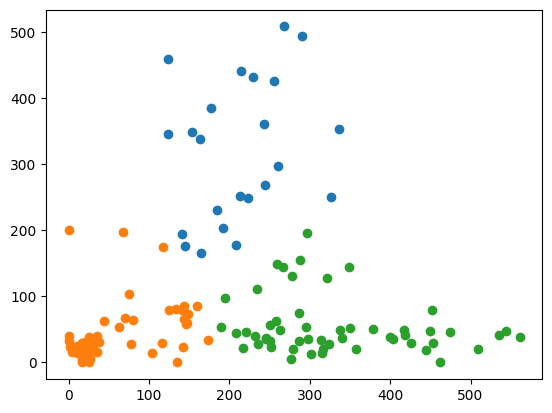

[[212.17391304 319.52173913]
 [ 48.          37.25675676]
 [331.41509434  54.52830189]]


In [38]:
# Prepare data for k-means
list_t_peliculas = [
    (np.array(tuples[0:2]), tuples[2])
    for tuples in df_peliculas.itertuples(index=False, name=None)
]
points_peliculas = [point for point, _ in list_t_peliculas]
labels_peliculas = [label for _, label in list_t_peliculas]

kn_peliculas = k_means(points_peliculas, 3)
print(kn_peliculas)